# Statistics about given data

In [35]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd

Data shape (977, 138)
X shape (977, 136)
y shape (977,)
There are 136 features
There are 7 uniques labels
Nombre d'instances de la classe anger : 149
Nombre d'instances de la classe disgust : 149
Nombre d'instances de la classe fear : 150
Nombre d'instances de la classe happy : 101
Nombre d'instances de la classe neutral : 130
Nombre d'instances de la classe sad : 149
Nombre d'instances de la classe surprise : 149


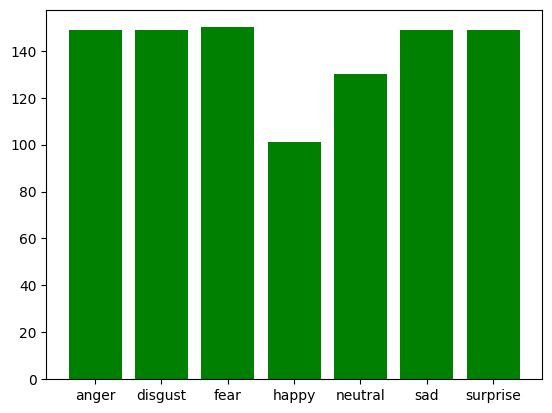

In [45]:
# Load CSV file
csv_path = "../project_data/training_set.csv"
data = pd.read_csv(csv_path).values

# Split data into features and labels
X = data[:, 2:]
y = data[:, 1]
image_names = data[:, 0]

# Inside X, there are landmarks coordinates, the first 67 columns are x coordinates, the last 67 columns are y coordinates
X_x = X[:, :68]
X_y = X[:, 68:]

# Print some stats
print("Data shape", data.shape)
print("X shape", X.shape)
print("y shape", y.shape)
print("There are {} features".format(X.shape[1]))
print("There are {} uniques labels".format(len(np.unique(y))))

# Plot histogram of labels
effectifs = {i:np.sum(y==i) for i in np.unique(y)}
for k,v in effectifs.items():
  print(f"Nombre d'instances de la classe {k} : {v}")

plt.bar(effectifs.keys(), effectifs.values(), color='g')
plt.show()

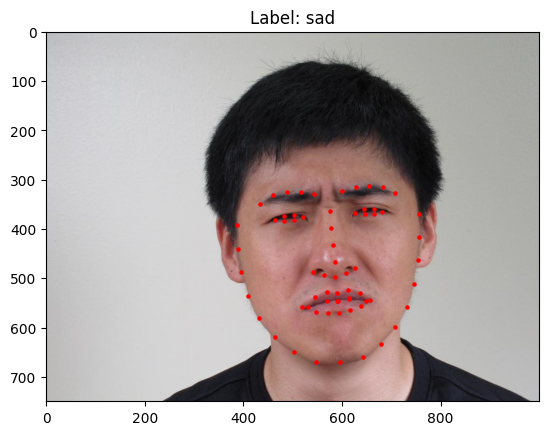

In [51]:
def plot_image(index):
    # Load image
    img = image.imread("../project_data/training_set/" + image_names[index])
    # Plot image
    plt.imshow(img)
    plt.title("Label: " + str(y[index]))
    # Draw landmarks
    for i in range(67):
        plt.scatter(X_x[index, i], X_y[index, i], c='r', s=5)

# Plot some images
plot_image(0)


Epoch 1/10
25/25 [==============================] - 4s 46ms/step - loss: 200.2634 - accuracy: 0.1242 - val_loss: 34.5853 - val_accuracy: 0.1071
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 41.3878 - accuracy: 0.1396 - val_loss: 27.7136 - val_accuracy: 0.2296
Epoch 3/10
25/25 [==============================] - 0s 11ms/step - loss: 35.8215 - accuracy: 0.1498 - val_loss: 20.1723 - val_accuracy: 0.2092
Epoch 4/10
25/25 [==============================] - 0s 14ms/step - loss: 25.1173 - accuracy: 0.1549 - val_loss: 16.3936 - val_accuracy: 0.1582
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 15.6348 - accuracy: 0.1754 - val_loss: 8.0090 - val_accuracy: 0.1684
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 19.0524 - accuracy: 0.1562 - val_loss: 21.2246 - val_accuracy: 0.2143
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 29.3116 - accuracy: 0.1562 - val_loss: 51.0069 - val_accuracy: 0.1531

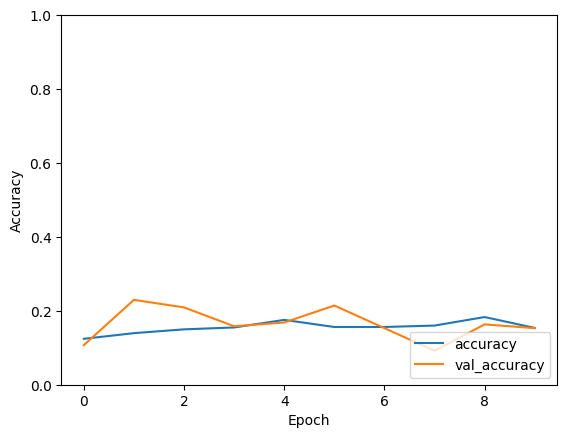

In [57]:
# Using sklearn to split data
from sklearn.model_selection import train_test_split

emotion_to_number = {
    "neutral": 0,
    "happy": 1,
    "sad": 2,
    "anger": 3,
    "surprise": 4,
    "disgust": 5,
    "fear": 6
}

# Convert labels to numbers
y_int = np.array([emotion_to_number[label] for label in y])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2)

# Make sure that the data is float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Build a simple CNN model
import tensorflow as tf
from keras.models import Sequential

model = Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
